In [1]:
#Import necessary packages.

import numpy as np
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, LSTM
from keras.models import load_model, Sequential
from keras.optimizers import Adam
import os
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

current_directory = os.getcwd()

/Accounts/huanga2/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Load datasets.

X_train = np.load("Training_data.npy")
X_test = np.load("Test_data.npy")
Y_train = np.load('Training_labels.npy')
Y_test = np.load('Test_labels.npy')
#test_reference = np.load('Test_reference.npy')
human_train = np.load('Human_Test.npy')
human_test = np.load('Human_Test_Labels.npy')
human_data_reference = np.load('human_Data_Reference.npy')

human_test_dict = {}

for i in range(len(human_data_reference)):
    if human_data_reference[i][0] not in human_test_dict:
        human_test_dict[human_data_reference[i][0]] = [[], []]
    human_test_dict[human_data_reference[i][0]][0].append(human_train[i])
    human_test_dict[human_data_reference[i][0]][1].append(human_test[i])
for item in human_test_dict:
    human_test_dict[item][0] = np.array(human_test_dict[item][0])
    human_test_dict[item][1] = np.array(human_test_dict[item][1])
    
print(X_train.shape)
print(X_test.shape)
print(len(Y_train))
print(len(Y_test))


(470250, 512)
(52250, 512)
470250
52250


In [3]:
#Regularize the data.

mean = X_train.mean(axis = 0)
X_train -= mean
X_test -= mean
for item in human_test_dict:
    human_test_dict[item][0] -= mean 

std = X_train.std(axis = 0)
X_train /= std
X_test /= std
for item in human_test_dict:
    human_test_dict[item][0] /= std

In [125]:
#[OPTIONAL] Choose a smaller sample.

train_data_selection = int(X_train.shape[0]*0.1)
test_data_selection = int(X_test.shape[0]*0.1)

X_train = X_train[:train_data_selection]
Y_train = Y_train[:train_data_selection]
X_test = X_test[:test_data_selection]
Y_test = Y_test[:test_data_selection]

print(X_train.shape)
print(X_test.shape)
print(len(Y_train))
print(len(Y_test))

(47027, 512)
(5225, 512)
47027
5225


In [4]:
#Load human data
human_acc_dict = {}
human_conjecture = ["l1_pua2mss1", "l1_rlaffin3", "l19_arytm_1", "l10_xxreal_2", "l13_xreal_0"]
def load_data(filename, human_acc_dict):
    '''
    Loads data from filename, assuming one sequence per line.
    Returns a list where each item is a string in the dataset.
    '''
    strings = None
    with open(filename,'r') as fid:
        lines = fid.readlines()
        for i in range(len(lines)):
            human_acc_dict[human_conjecture[i]] = float(lines[i])
    return human_acc_dict
load_data('human_data.txt', human_acc_dict)
print(human_acc_dict)

{'l1_pua2mss1': 94.4, 'l1_rlaffin3': 94.4, 'l19_arytm_1': 55.5, 'l10_xxreal_2': 56.7, 'l13_xreal_0': 65.3}


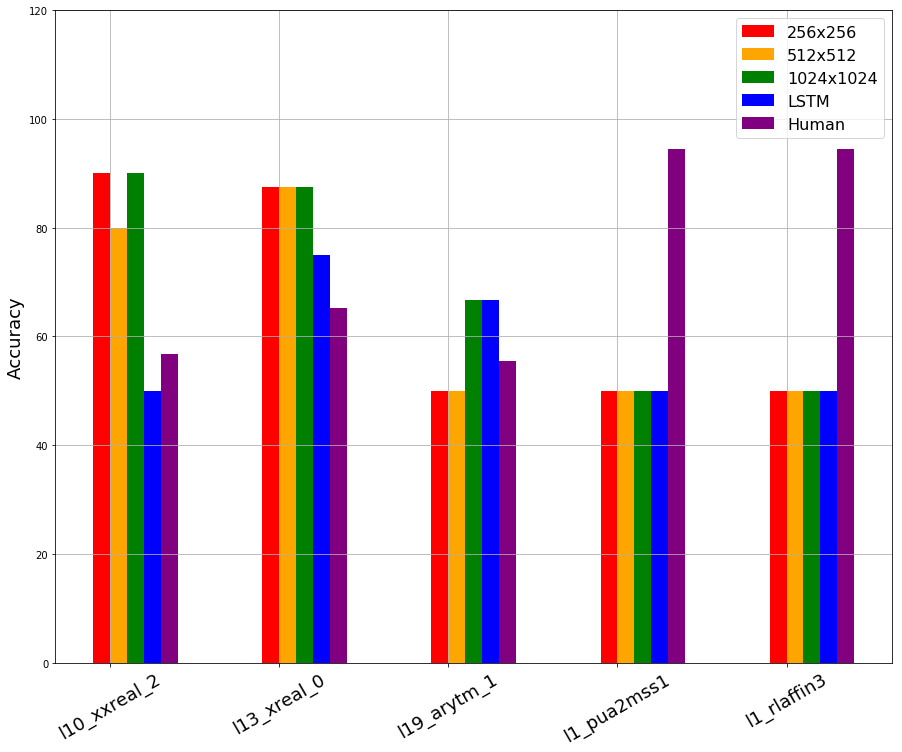

In [7]:
#plot combined graph for comparson between human and computer
plt.rcParams['figure.figsize'] = 15, 12
human_acc = []
names = []
for item in human_test_dict:
    human_acc.append(human_acc_dict[item])
    names.append(item)

    
i = 0
neural_acc = [[] for i in range(4)]
#Collect the accuracy across the human test set
for l in range(8, 11):
    model = load_model('data/{}x{}_model.h5'.format(2 ** l, 2 ** l))
    for item in human_test_dict:
        test_loss, test_acc = model.evaluate(human_test_dict[item][0], human_test_dict[item][1], verbose = 0)
        neural_acc[i].append(test_acc*100)
    i = i + 1
    

    
model = load_model("data/LSTMmodel.h5")    
for item in human_test_dict:
    
    test_loss, test_acc = model.evaluate(np.array([[i] for i in human_test_dict[item][0]]), np.array([[i] for i in human_test_dict[item][1]]), verbose = 0)
    neural_acc[3].append(test_acc*100)

        
#Plot the diagram            
width = 0.1
ind = np.arange(5)            
fig, bx = plt.subplots()
rec256 = bx.bar(ind, neural_acc[0], width, color='r')
rec512 = bx.bar(ind+width, neural_acc[1], width, color='orange')
rec1024 = bx.bar(ind + 2*width, neural_acc[2], width, color='green')
recLSTM = bx.bar(ind+3*width, neural_acc[3], width, color='blue')
recHuman = bx.bar(ind+4*width, human_acc, width, color='purple')

bx.set_ylabel('Accuracy', fontsize=18)
bx.set_xticks(ind + width / 2)
bx.set_xticklabels(names, rotation = 30, fontsize="18")
bx.set_yticks(np.arange(0,140,20))
bx.legend((rec256[0], rec512[0], rec1024[0], recLSTM[0], recHuman[0]), ('256x256', '512x512', '1024x1024', 'LSTM', 'Human'), fontsize="16")
plt.grid()
plt.show()

In [ ]:
for L in [(256, 256), (512, 512), (1024, 1024)]:
    model = load_model('{}x{}_model.h5'.format(L[0], L[1]))
    for item in human_dict:
        predictions = model.predict(human[item][0]) >= 0.5 
        print(predictions)
        
        per = np.sum(mislabeled) / mislabeled.shape[0]
    
    print('Percentage of misclassified positive test examples (false negatives) for {}\u00D7{} model: {}%.'.format(L[0], L[1], round(100*per, 2)))



In [8]:
#Find the efficiency for each fully connected model


model_efficiency = []
name_list = [(256, 256), (512, 512), (1024, 1024)]

for L in name_list:
    with open('data/{}x{}_model_history.pickle'.format(L[0], L[1]), 'rb') as dictionary:
        history = pickle.load(dictionary).history
    accuracy = 0
    i = 0
    while accuracy < 0.72 and i < len(history['val_acc']):
        accuracy = history['val_acc'][i] 
        i = i + 1
    model_efficiency.append(i)


with open('data/LSTM_history.pickle', 'rb') as dictionary:
    history = pickle.load(dictionary)
accuracy = 0
i = 0
while accuracy < 0.72 and i < len(history['val_acc']):
    accuracy = history['val_acc'][i] 
    i = i + 1
model_efficiency.append(i)

print(model_efficiency)

    

[238, 137, 72, 17]


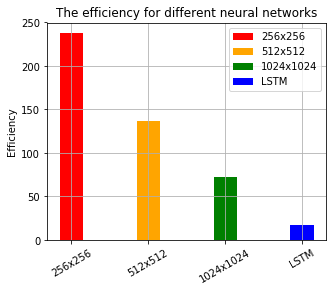

In [9]:
#plot the efficiency
names = ('256x256', '512x512', '1024x1024', 'LSTM')
plt.rcParams['figure.figsize'] = 5, 4
width = 0.3
ind = np.arange(4)         
fig, bx = plt.subplots()
rec256 = bx.bar(ind[0]+width/2, model_efficiency[0], width, color='r', align='center')
rec512 = bx.bar(ind[1]+width/2, model_efficiency[1], width, color='orange', align='center')
rec1024 = bx.bar(ind[2]+width/2, model_efficiency[2], width, color='green', align='center')
recLSTM = bx.bar(ind[3]+width/2, model_efficiency[3], width, color='blue', align='center')


bx.set_ylabel('Efficiency')
bx.set_title('The efficiency for different neural networks')
bx.set_xticks(ind + width / 2)
bx.set_xticklabels(names, rotation = 30)
bx.legend((rec256[0], rec512[0], rec1024[0], recLSTM[0]), ('256x256', '512x512', '1024x1024', 'LSTM'))
plt.grid()
plt.show()

In [43]:
#Find the test accuracy acorss four models
name_list = [(256, 256), (512, 512), (1024, 1024)]
neural_test_acc = []
# os.chdir(current_directory + '/models')

for i in range(len(name_list)):
    model = load_model('{}x{}_model.h5'.format(name_list[i][0], name_list[i][1]))
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 2)
    neural_test_acc.append(test_acc*100)
    
model = load_model("LSTMmodel.h5")    
test_loss, test_acc = model.evaluate(np.array([[i] for i in X_test]), np.array([[i] for i in Y_test]), verbose = 0)
neural_test_acc.append(test_acc*100)
print(neural_test_acc)

[73.0909090918217, 73.71291865937447, 74.79234449669505, 73.82583732011786]


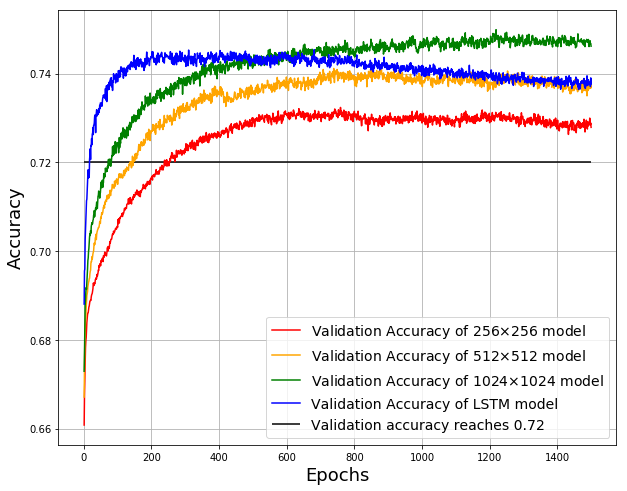

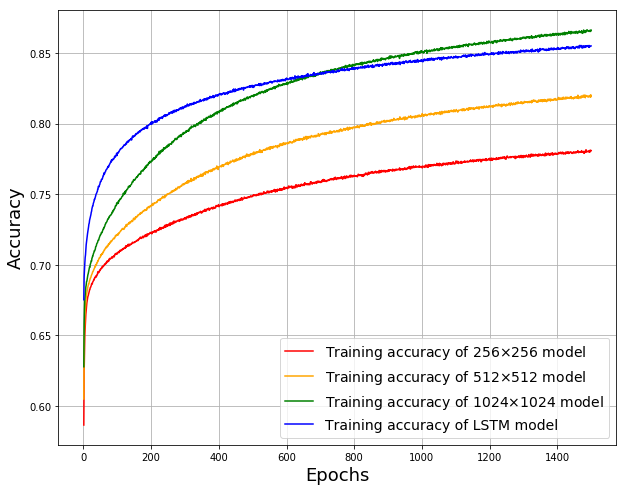

In [35]:
plt.rcParams['figure.figsize'] = 20, 16
#Plot and display training accuracy and loss for four models.
os.chdir(current_directory)
name_list = [(256, 256), (512, 512), (1024, 1024)]
history_dict = {}
for L in name_list:
    with open('models/{}x{}_model_history.pickle'.format(L[0], L[1]), 'rb') as dictionary:
        history_dict['{}x{}'.format(L[0], L[1])] = pickle.load(dictionary).history

        
with open("models/LSTM_history.pickle", 'rb') as dictionary:
        history_dict["LSTM"] = pickle.load(dictionary)
val_acc, train_acc = {}, {}
step = 1 #Display only step-multiple epochs to avoid congested plot.
for key in history_dict.keys():
    val_acc[key] = [history_dict[key]['val_acc'][n] for n in range(len(history_dict[key]['val_acc'])) if n % step == 0]
    train_acc[key] = [history_dict[key]['acc'][n] for n in range(len(history_dict[key]['acc'])) if n % step == 0]

epochs = range(step, step * (len(train_acc['256x256']) + 1), step)

fig = plt.figure(figsize = (10, 8))



plt.plot(epochs, val_acc['256x256'], label = 'Validation Accuracy of 256' + r'$\times$' + '256 model', color="red")
plt.plot(epochs, val_acc['512x512'], label = 'Validation Accuracy of 512' + r'$\times$' + '512 model', color="orange")
plt.plot(epochs, val_acc['1024x1024'], label = 'Validation Accuracy of 1024' + r'$\times$' + '1024 model', color="green")
plt.plot(epochs, val_acc['LSTM'], label = 'Validation Accuracy of LSTM model', color="blue")
plt.hlines(0.72, 0, 1500, label = 'Validation accuracy reaches 0.72')
plt.xlabel('Epochs', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.grid()
plt.legend(fontsize = 14)
plt.savefig('Validation_Accuracy_for_selected_models.pdf')
plt.show()

fig = plt.figure(figsize = (10, 8))

plt.plot(epochs, train_acc['256x256'], label = 'Training accuracy of 256' + r'$\times$' + '256 model', color="red")
plt.plot(epochs, train_acc['512x512'], label = 'Training accuracy of 512' + r'$\times$' + '512 model', color="orange")
plt.plot(epochs, train_acc['1024x1024'], label = 'Training accuracy of 1024' + r'$\times$' + '1024 model', color="green")
plt.plot(epochs, train_acc['LSTM'], label = 'Training accuracy of LSTM model', color="blue")



plt.xlabel('Epochs', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.grid()
plt.legend(fontsize = 14)
plt.savefig('Training_accuracy_for_selected_models.pdf')
plt.show()

In [12]:
#Find the specific choice for the neural network for the five human conjectures.


predictions = {}

for L in [(256, 256), (512, 512), (1024, 1024)]:
    model = load_model('data/{}x{}_model.h5'.format(L[0], L[1]))
    print("The result for {}x{}_model".format(L[0], L[1]))
    for item in human_test_dict:
        predictions[item] = model.predict(human_test_dict[item][0]) >= 0.5
        print([list(i) for i in list(predictions[item])])

        
model = load_model('data/LSTMmodel.h5'.format(L[0], L[1]))
print("The result for LSTM model")
for item in human_test_dict:  
    predictions[item] = model.predict(np.array([[i] for i in human_test_dict[item][0]])) >= 0.5
    print([list(i) for i in list(predictions[item])])


    

The result for 256x256_model
[[True], [True], [True], [True], [True], [True], [False], [False], [False], [False]]
[[True], [True], [True], [True], [True], [False], [False], [False]]
[[True], [True], [True], [True], [True], [True]]
[[True], [True]]
[[True], [True]]
The result for 512x512_model
[[True], [False], [True], [True], [True], [True], [False], [False], [False], [False]]
[[True], [True], [True], [True], [False], [True], [False], [False]]
[[True], [True], [True], [True], [True], [True]]
[[True], [True]]
[[True], [True]]
The result for 1024x1024_model
[[True], [False], [True], [True], [True], [False], [False], [False], [False], [False]]
[[True], [True], [True], [True], [True], [False], [False], [False]]
[[True], [True], [True], [True], [False], [True]]
[[True], [True]]
[[True], [True]]
The result for LSTM model
[[False], [False], [True], [True], [False], [True], [False], [True], [False], [False]]
[[True], [True], [True], [True], [True], [True], [False], [False]]
[[True], [True], [T

In [13]:
#Misclassified positive examples (false negatives).


#For 256x256, 512x512, 1024x1024
for L in [(256, 256), (512, 512), (1024, 1024)]:
    model = load_model('data/{}x{}_model.h5'.format(L[0], L[1]))
    predictions = model.predict(X_test) >= 0.5 
    mislabeled = np.zeros(Y_test.shape)
    for m in range(mislabeled.shape[0]):
        if Y_test[m] == 1 and predictions[m] == [False]:
            mislabeled[m] = 1
    per = np.sum(mislabeled) / mislabeled.shape[0]
    
    print('Percentage of misclassified positive test examples (false negatives) for {}\u00D7{} model: {}%.'.format(L[0], L[1], round(100*per, 2)))

#For LSTM
model = load_model('data/LSTMmodel.h5'.format(L[0], L[1]))
predictions = model.predict(np.array([[i] for i in X_test])) >= 0.5

mislabeled = np.zeros(Y_test.shape)
for m in range(mislabeled.shape[0]):

    if Y_test[m] == 1 and predictions[m] == [False]:
        mislabeled[m] = 1

per = np.sum(mislabeled) / mislabeled.shape[0]
    
print('Percentage of misclassified positive test examples (false negatives) for LSTM model: {}%', round(100*per, 2))

Percentage of misclassified positive test examples (false negatives) for 256×256 model: 11.13%.
Percentage of misclassified positive test examples (false negatives) for 512×512 model: 10.5%.
Percentage of misclassified positive test examples (false negatives) for 1024×1024 model: 9.11%.
Percentage of misclassified positive test examples (false negatives) for LSTM model: {}% 12.14


In [15]:
#Misclassified negative examples (false positives).

#For 256x256, 512x512, 1024x1024
for L in [(256, 256), (512, 512), (1024, 1024)]:
    model = load_model('data/{}x{}_model.h5'.format(L[0], L[1]))
    predictions = model.predict(X_test) >= 0.5
    mislabeled = np.zeros(Y_test.shape)
    for m in range(mislabeled.shape[0]):
        if Y_test[m] == 0 and predictions[m] == [True]:
            mislabeled[m] = 1
    per = np.sum(mislabeled) / mislabeled.shape[0]
    
    print('Percentage of misclassified negative test examples (false negatives) for {}\u00D7{} model: {}%.'.format(L[0], L[1], round(100*per, 2)))
#For LSTM
model = load_model('data/LSTMmodel.h5')
predictions = model.predict(np.array([[i] for i in X_test])) >= 0.5 
mislabeled = np.zeros(Y_test.shape)
for m in range(mislabeled.shape[0]):
    if Y_test[m] == 0 and predictions[m] == [True]:
        mislabeled[m] = 1
per = np.sum(mislabeled) / mislabeled.shape[0]
    
print('Percentage of misclassified negative test examples (false positives) for LSTM model: {}%.', round(100*per, 2))


Percentage of misclassified negative test examples (false negatives) for 256×256 model: 15.77%.
Percentage of misclassified negative test examples (false negatives) for 512×512 model: 15.78%.
Percentage of misclassified negative test examples (false negatives) for 1024×1024 model: 16.1%.
Percentage of misclassified negative test examples (false positives) for LSTM model: {}%. 14.03
